# **K-means Clustering**

Mengimport modul yang diperlukan. Pandas digunakan untuk membaca dan memanipulasi data dalam format DataFrame. TfidfVectorizer digunakan untuk mengubah teks menjadi representasi numerik menggunakan metode TF-IDF. KMeans adalah algoritma clustering yang digunakan untuk mengelompokkan data. LabelEncoder digunakan untuk mengkodekan label cluster menjadi bilangan bulat.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

Masukan Data yang akan diproses. Disini masukan data dari hasil preprocessing data.

In [2]:
data = pd.read_csv('preprocessing-pemilu.csv')
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,user_id_str,username,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming,to_sentence
0,1.783122e+18,Wed Apr 24 13:11:27 +0000 2024,16,Dana bansos di tahun pemilu 2024 dikeluarkan ...,1.783122e+18,https://pbs.twimg.com/ext_tw_video_thumb/17831...,NaN,in,NaN,0,...,1.605747e+18,dancersejati07,Dana bansos di tahun pemilu 2024 dikeluarkan ...,Dana bansos tahun pemilu dikeluarkan mulai ad...,dana bansos tahun pemilu dikeluarkan mulai ad...,"['dana', 'bansos', 'tahun', 'pemilu', 'dikelua...","['dana', 'bansos', 'tahun', 'pemilu', 'dikelua...","['dana', 'bansos', 'pemilu', 'dikeluarkan', 't...","['dana', 'bansos', 'milu', 'keluar', 'triliun'...",dana bansos milu keluar triliun rupiah biar ja...
1,1.783469e+18,Thu Apr 25 12:10:16 +0000 2024,37,Breaking News - Pemilu Usai Saatnya Bersama Me...,1.783469e+18,https://pbs.twimg.com/ext_tw_video_thumb/17834...,NaN,in,Jakarta Capital Region,10,...,1.334853e+18,Mdy_Asmara1701,Breaking News - Pemilu Usai Saatnya Bersama Me...,Breaking News Pemilu Usai Saatnya Bersama Memb...,breaking news pemilu usai saatnya bersama memb...,"['breaking', 'news', 'pemilu', 'usai', 'saatny...","['breaking', 'news', 'pemilu', 'usai', 'saatny...","['breaking', 'news', 'pemilu', 'membangun', 'n...","['breaking', 'news', 'milu', 'bangun', 'negeri']",breaking news milu bangun negeri
2,1.782759e+18,Tue Apr 23 13:10:12 +0000 2024,14156,Setelah keciduk foto ama Zionis dan suaranya k...,1.782759e+18,https://pbs.twimg.com/media/GL2hv66agAAAglB.jpg,NaN,in,"Jakarta, Indonesia",205,...,6.956131e+07,erlanishere,Setelah keciduk foto ama Zionis dan suaranya k...,Setelah keciduk foto ama Zionis dan suaranya k...,setelah keciduk foto ama zionis dan suaranya k...,"['setelah', 'keciduk', 'foto', 'ama', 'zionis'...","['setelah', 'keciduk', 'foto', 'sama', 'zionis...","['keciduk', 'foto', 'zionis', 'suaranya', 'ken...","['ciduk', 'foto', 'zionis', 'suara', 'kena', '...",ciduk foto zionis suara kena boikot pas milu k...
3,1.783469e+18,Thu Apr 25 12:12:20 +0000 2024,182,as pemilu 2024 comes to an end... i'm ending i...,1.783469e+18,https://pbs.twimg.com/media/GMAnqiQasAEc3PM.jpg,NaN,en,Indonesia,3,...,8.307419e+17,meihqtsume,as pemilu 2024 comes to an end... i'm ending i...,pemilu comes end ending too little finale clo...,pemilu comes end ending too little finale clo...,"['pemilu', 'comes', 'end', 'ending', 'too', 'l...","['pemilu', 'comes', 'end', 'ending', 'too', 'l...","['pemilu', 'comes', 'end', 'ending', 'too', 'l...","['milu', 'comes', 'end', 'ending', 'too', 'lit...",milu comes end ending too little finale close ...
4,1.782415e+18,Mon Apr 22 14:24:15 +0000 2024,616,. . Mereka telah menemukan caranya .. Pemilu-P...,1.782415e+18,https://pbs.twimg.com/ext_tw_video_thumb/17824...,NaN,in,Social Media Influencer,4,...,1.529491e+18,StefanAntonio__,. . Mereka telah menemukan caranya .. Pemilu-P...,Mereka telah menemukan caranya Pemilu Pemilu ...,mereka telah menemukan caranya pemilu pemilu ...,"['mereka', 'telah', 'menemukan', 'caranya', 'p...","['mereka', 'telah', 'menemukan', 'caranya', 'p...","['menemukan', 'pemilu', 'pemilu', 'kedepan', '...","['temu', 'milu', 'milu', 'depan', 'tinggal', '...",temu milu milu depan tinggal sempurna milu era...


Mengubah kolom nan mengjadi string kosong, agar tidak ada error/kesalahan.

In [3]:
# Ganti nilai np.nan dengan string kosong
data['to_sentence'].fillna('', inplace=True)

Vektorisasi data menjadi nilai, disini menggunakan TF-IDF untuk mengektrasi nya.

In [4]:
tfidf_vectorizer = TfidfVectorizer()
text_features = tfidf_vectorizer.fit_transform(data['to_sentence'])

Kemudian menginisialisasi objek KMeans dengan jumlah cluster yang diinginkan (di sini, 3 cluster) dan random_state digunakan untuk mengatur inisialisasi centroid secara acak agar hasilnya dapat direproduksi, disini memakai nilai 42 karena sering digunakan untuk proses ini. Namun ini bisa diubah sesuai dengan keinginan. Dan untuk cluster nya disini di set 3, karena kasusnya disini akan memakai 3 cluster yakni positif, netral dan negatif.

In [5]:
# Inisialisasi dan melatih model KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(text_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

Menambahkan label/pemetaan untuk hasil setelah kmeans berdasarkan ketentuan kategori untuk 0 negatif, 1 netral dan 2 positif. Kemudian membuat kolom baru berupa sentimen untuk hasil pelabelan.

In [6]:
# Menambahkan label cluster ke data
data['cluster'] = kmeans.labels_

# Menerjemahkan label cluster menjadi positif, negatif, dan netral
label_encoder = LabelEncoder()
data['sentimen'] = label_encoder.fit_transform(data['cluster'])
sentiment_mapping = {0: 'Negatif', 1: 'Netral', 2: 'Positif'}
data['sentimen'] = data['sentimen'].map(sentiment_mapping)

# Menampilkan hasil
data[['to_sentence', 'cluster', 'sentimen']]

,to_sentence,cluster,sentimen
0,dana bansos milu keluar triliun rupiah biar ja...,0,Negatif
1,breaking news milu bangun negeri,0,Negatif
2,ciduk foto zionis suara kena boikot pas milu k...,0,Negatif
3,milu comes end ending too little finale close ...,0,Negatif
4,temu milu milu depan tinggal sempurna milu era...,1,Netral
...,...,...,...
284,hakim menang samsul milu bubar negara hukum hu...,2,Positif
285,milu tantang polarisasi politik tajam serta re...,0,Negatif
286,rajut saudara rangkai milu milu amandamai suks...,0,Negatif
287,indonesia solid pasca milu jaga satu satu haru...,0,Negatif


Terakhir, simpan hasil kedalam csv.

In [7]:
data.to_csv('hasil_sentimen_kmeans-pemilu.csv', index=False)

# **Presentase Data Berdasarkan Jenis Sentimen Dan Visualisasi Hasil K-means**

Menghitung jumlah data berdasarkan sentimennya dengan menggunakan fungsi code value_counts(). Kemudian menghitung presentase dari jumlah tersebut dengan membulatkan presentase menjadi satu angka desimal, dan membuat DataFrame baru yang berisi hasilnya.

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [10]:
sentimen_counts = data['sentimen'].value_counts()  #Menghitung jumlah data persentimennya
total_data = len(data)
sentimen_percentages = (sentimen_counts / total_data) * 100    #Menghitung presentase
sentimen_percentages = sentimen_percentages.round(1).astype(str) + '%'    #Membuat 1 angka dibelakang koma
result_df = pd.DataFrame({'Sentimen': sentimen_counts.index, 'Jumlah': sentimen_counts.values, 'Presentase': sentimen_percentages.values})
result_df

,Sentimen,Jumlah,Presentase
0,Negatif,134,46.4%
1,Netral,111,38.4%
2,Positif,44,15.2%


Diagram Pie

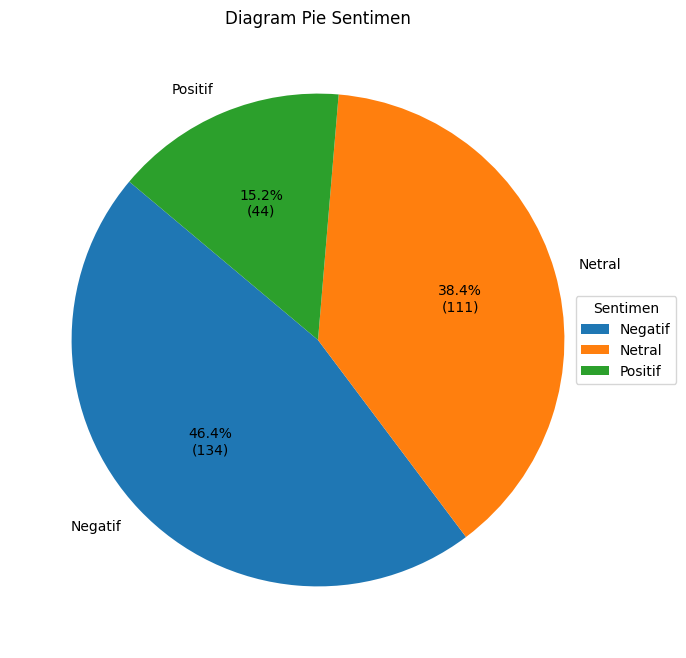

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(sentimen_counts) / 100),
        startangle=140)

plt.legend(sentimen_counts.index, title='Sentimen', loc='center', bbox_to_anchor=(1, 0.5))
plt.title('Diagram Pie Sentimen')

plt.savefig('diagram_sentimen-pie.png')  # Gantilah 'diagram_sentimen.png' sesuai dengan nama file yang Anda inginkan
plt.show()
plt.close()

Diagram Batang

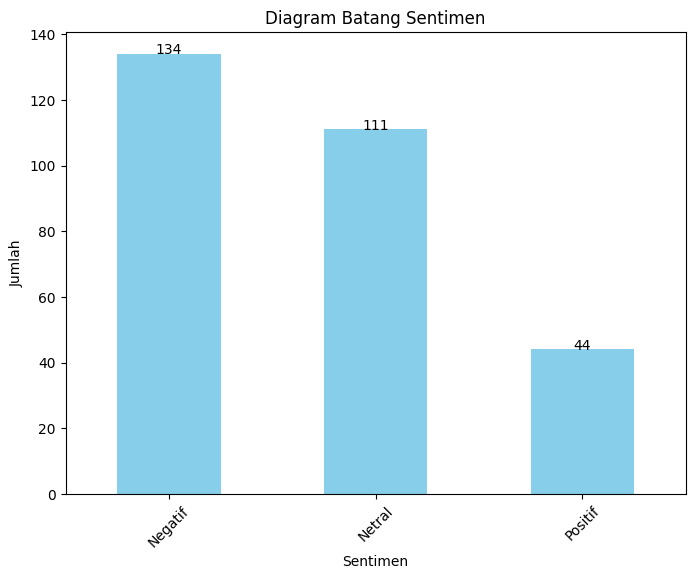

In [12]:
#Membuat diagram batang
plt.figure(figsize=(8, 6))
sentimen_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Diagram Batang Sentimen')
plt.xticks(rotation=45)

#Menambahkan keterangan nilai di atas diagram batang
for index, value in enumerate(sentimen_counts):
    plt.text(index, value + 0.1, str(value), ha='center')


plt.savefig('diagram_sentimen-batang')  # Gantilah 'diagram_sentimen.png' sesuai dengan nama file yang Anda inginkan
plt.show()
plt.close()

Plot Clustering dengan PCA

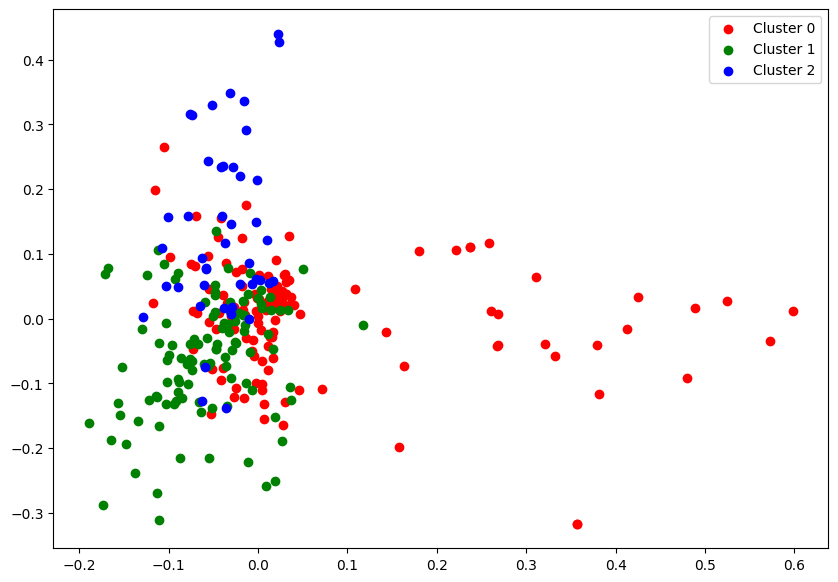

In [13]:
pca = PCA(n_components=2)
text_features_pca = pca.fit_transform(text_features.toarray())

labels = kmeans.labels_

plt.figure(figsize=(10, 7))

# Menentukan warna untuk setiap label cluster
colors = ['red', 'green', 'blue']
for i in range(len(set(labels))):
    plt.scatter(text_features_pca[labels == i, 0], text_features_pca[labels == i, 1], c=colors[i], label=f'Cluster {i}')

plt.savefig('plot-clustering-pca.png')  # Gantilah 'diagram_sentimen.png' sesuai dengan nama file yang Anda inginkan
plt.legend()
plt.show()
plt.close()

clustering kmeans with plot pca : https://www.geeksforgeeks.org/clustering-text-documents-using-k-means-in-scikit-learn/